In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
data=pd.read_csv('Unemployment_in_India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [4]:
print("regions:",pd.unique(data['Region']))
print("total regions:",len(pd.unique(data['Region'])))

regions: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']
total regions: 29


In [5]:
pd.unique(data['Area'])

array(['Rural', nan, 'Urban'], dtype=object)

In [6]:
print(pd.unique(data[' Frequency']))

[' Monthly' nan 'Monthly']


In [7]:
#since frequency consist of single frequence item it is better to remove it so
data.drop(' Frequency',axis=1,inplace=True)

In [8]:
#number of empty values for area
ls_of_nan_inArea=[i for i in data['Area'] if (i!='Rural') and (i!='Urban')]
len(ls_of_nan_inArea)

28

In [9]:
#deleting those 28 rows which have areas and regions nan and  empty
data.dropna(subset=['Area'],axis=0)
data.dropna(subset=['Region'],axis=0)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban


In [10]:
#all regions
regions=[i for i in pd.unique(data['Region'])]
regions.remove(np.nan)
for i in regions :
  print(i)

Andhra Pradesh
Assam
Bihar
Chhattisgarh
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu & Kashmir
Jharkhand
Karnataka
Kerala
Madhya Pradesh
Maharashtra
Meghalaya
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttar Pradesh
Uttarakhand
West Bengal
Chandigarh


In [11]:
#let's map regions with numbers from 1-29 to make it easier to be analyzed and understood by machine
regions=[i for i in pd.unique(data['Region'])]
region_id=[i for i in range(1,29)]
region_map=dict(zip(regions,region_id))
region_map

{'Andhra Pradesh': 1,
 'Assam': 2,
 'Bihar': 3,
 'Chhattisgarh': 4,
 'Delhi': 5,
 'Goa': 6,
 'Gujarat': 7,
 'Haryana': 8,
 'Himachal Pradesh': 9,
 'Jammu & Kashmir': 10,
 'Jharkhand': 11,
 'Karnataka': 12,
 'Kerala': 13,
 'Madhya Pradesh': 14,
 'Maharashtra': 15,
 'Meghalaya': 16,
 'Odisha': 17,
 'Puducherry': 18,
 'Punjab': 19,
 'Rajasthan': 20,
 'Sikkim': 21,
 'Tamil Nadu': 22,
 'Telangana': 23,
 'Tripura': 24,
 'Uttar Pradesh': 25,
 'Uttarakhand': 26,
 'West Bengal': 27,
 nan: 28}

In [12]:
data['regions']=data['Region'].map(region_map)
data.drop('Region',axis=1,inplace=True)

In [13]:
#similarly mapping area
area_map={
    'Rural':1,
    'Urban':2
            }

data['area']=data['Area'].map(area_map)
data.drop('Area',axis=1,inplace=True)
data.head()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),regions,area
0,31-05-2019,3.65,11999139.0,43.24,1.0,1.0
1,30-06-2019,3.05,11755881.0,42.05,1.0,1.0
2,31-07-2019,3.75,12086707.0,43.50,1.0,1.0
3,31-08-2019,3.32,12285693.0,43.97,1.0,1.0
4,30-09-2019,5.17,12256762.0,44.68,1.0,1.0


In [14]:
# converting string dates into actual dates
data['date'] = pd.to_datetime(data[' Date'].str.strip(), format='%d-%m-%Y')
data.drop(' Date', axis=1, inplace=True)
data.head()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),regions,area,date
0,3.65,11999139.0,43.24,1.0,1.0,2019-05-31
1,3.05,11755881.0,42.05,1.0,1.0,2019-06-30
2,3.75,12086707.0,43.50,1.0,1.0,2019-07-31
3,3.32,12285693.0,43.97,1.0,1.0,2019-08-31
4,5.17,12256762.0,44.68,1.0,1.0,2019-09-30


<Axes: >

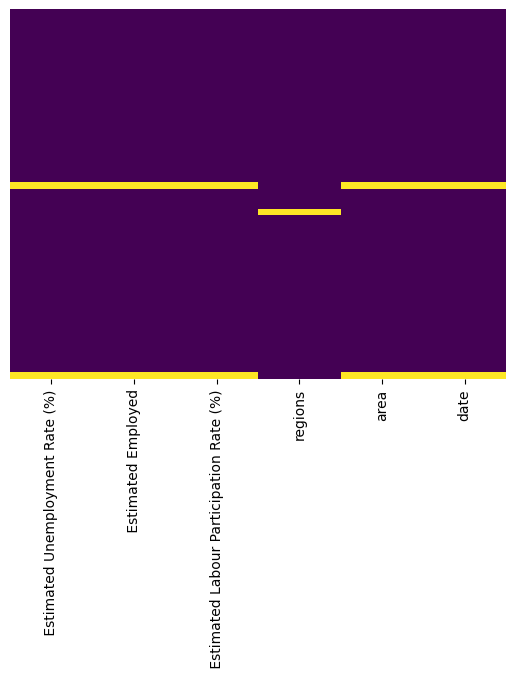

In [15]:
#checking if we have any features with empty data
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: >

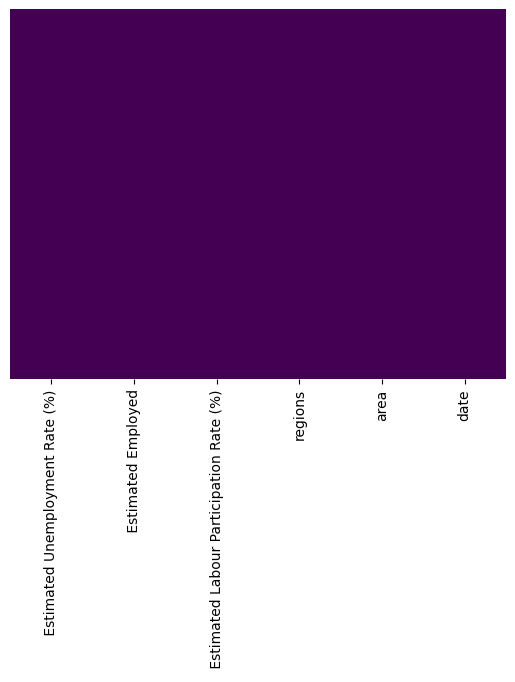

In [16]:
#since there were few places with empty field value it is better to clean those rows
data = data.dropna(axis=0)
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='regions', ylabel=' Estimated Employed'>

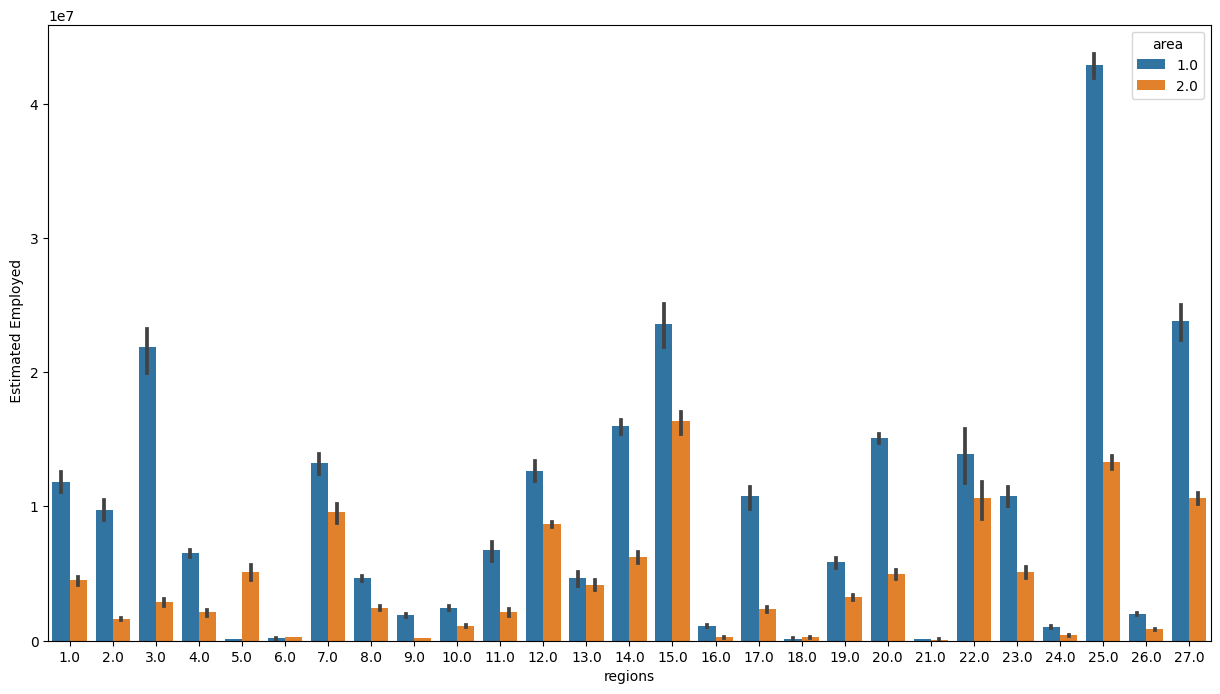

In [17]:
#shows average number of people employed in each areas of each regions in 2019
plt.figure(figsize=(15, 8))
sns.barplot(data=data,x='regions',y=' Estimated Employed',estimator='mean',hue='area')

<Axes: xlabel='regions', ylabel=' Estimated Unemployment Rate (%)'>

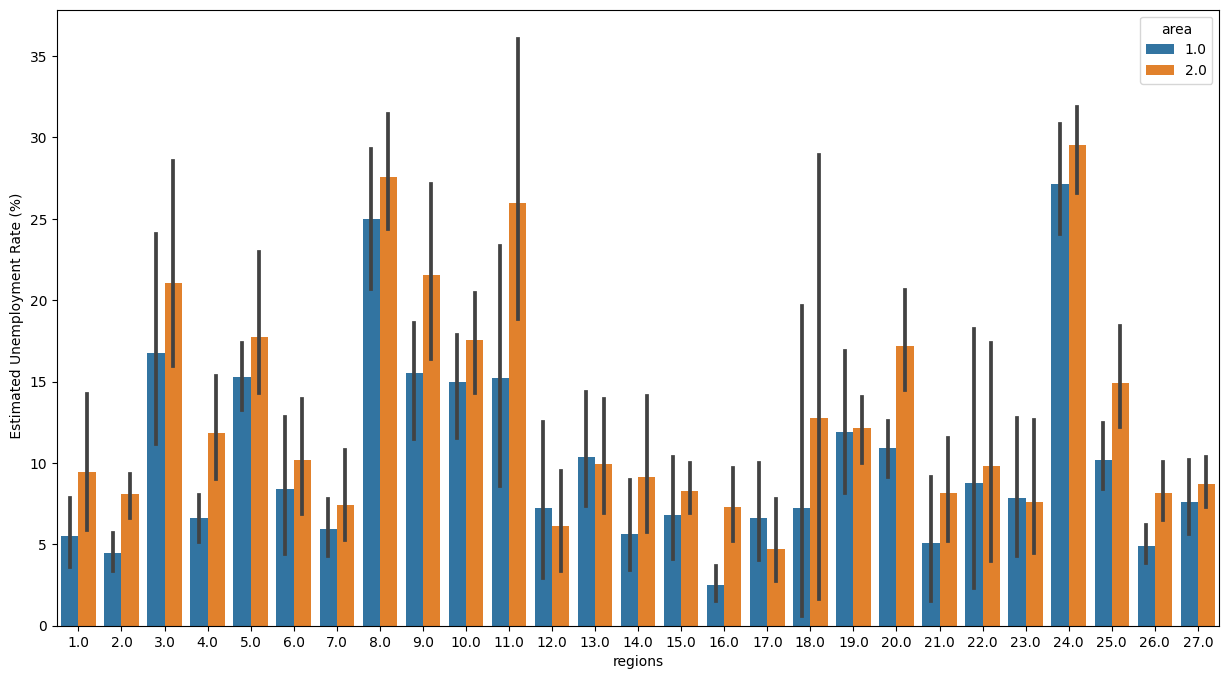

In [18]:
#above graph shows there are more people employed in rural(1) areas of each regions than in urban(2) regions during covid

#shows average unemployment rate of people employed in each areas of each regions in 2019
plt.figure(figsize=(15, 8))
sns.barplot(data=data,x='regions',y=' Estimated Unemployment Rate (%)',estimator='mean',hue='area')

In [19]:
#conclusion
#this graph relates well with upper graph as there are more employed people in rural than in urban during covid-19
#which ultimately means unemployment growth rate is less in rural as they rely more in agriculture
#it makes sence as unemployment rate is more in city(2) area than in rural(1)
#because people of city area relies more in industrial and business oriented occupation and during covid,
#gathering of people is not much allowed which makes them enforced to lose their job which results in high unemployment  growth rate